In [1]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer.noise import NoiseModel
from qiskit import QuantumCircuit, execute, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram
from numpy import random

from qiskit.opflow import PauliTrotterEvolution, Suzuki
# from qiskit.quantum_info import to_circuit

## Circuit

{-6.283185307179586: None, -6.101063993928004: None, -5.918942680676421: None, -5.73682136742484: None, -5.554700054173257: None, -5.372578740921675: None, -5.190457427670093: None, -5.008336114418511: None, -4.826214801166929: None, -4.644093487915346: None, -4.461972174663764: None, -4.279850861412182: None, -4.0977295481606: None, -3.9156082349090173: None, -3.7334869216574353: None, -3.5513656084058534: None, -3.369244295154271: None, -3.1871229819026885: None, -3.0050016686511065: None, -2.8228803553995245: None, -2.640759042147942: None, -2.4586377288963597: None, -2.276516415644778: None, -2.0943951023931957: None, -1.9122737891416133: None, -1.7301524758900308: None, -1.5480311626384484: None, -1.3659098493868669: None, -1.1837885361352845: None, -1.001667222883702: None, -0.8195459096321205: None, -0.637424596380538: None, -0.4553032831289556: None, -0.2731819698773732: None, -0.09106065662579077: None, 0.09106065662579077: None, 0.2731819698773732: None, 0.4553032831289556: N

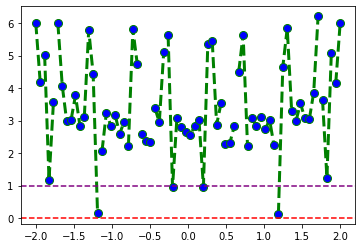

In [4]:
## Circuit 1 for winding number

def U1(circ, i, **kwargs):
    circ.cnot(q[i], q[i+1])
    circ.rz(-6*np.pi/4, q[i])
    circ.ry(2*kwargs.get("theta"), q[i])
    circ.cnot(q[i+1], q[i])
    circ.ry(-2*kwargs.get("theta"), q[i])
    circ.cnot(q[i+1], q[i])
    circ.rz(6*np.pi/4, q[i])
    circ.cnot(q[i], q[i+1])
    return circ

def final_circ(circ, q, **kwargs):
    for k in range(40):
        for i in range(len(q)-1):
            if i%2 == 0:
                f1 = U1(circ, i, theta = kwargs.get('alpha'))

        for i in range(len(q)-1):
            if i%2 != 0:
                f2 = U1(circ, i, theta = kwargs.get('beta'))

        for i in range(len(q)-1):
            if i%2 == 0:
                f3 = U1(circ, i, theta = kwargs.get('alpha'))

        circ.barrier()
    circ.measure_all()
    circ.draw(output="mpl")
    return circ

Beta = np.linspace(-2*np.pi, 2*np.pi, 70)
c = {i: None for i in Beta}
exprob_even = 0
for beta in Beta:
    q = QuantumRegister(8)
    circ = QuantumCircuit(q)
    circ.x(q[2])
    f4 = final_circ(circ, q, alpha=1.3*np.pi, beta = beta)
    job = execute(circ, Aer.get_backend('qasm_simulator'), shots=1000)
    counts = {key: value/1000 for key, value in job.result().get_counts().items()}
    for key, value in counts.items():
        for g in range(len(key)):
            if g%2!=0 and key[g]=='1':
                exprob_even += (g)*value     
    c[beta/np.pi] = exprob_even
    exprob_even = 0
print(c)

lists = sorted(c.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=8)
# plt.xlim([0, 2])

plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=1, color='purple', linestyle='--')

plt.show()

In [26]:
## for betadataset = 70, n=40
{-6.283185307179586: 0, -6.101063993928004: 0, -5.918942680676421: 0, -5.73682136742484: 0, -5.554700054173257: 0, -5.372578740921675: 0, -5.190457427670093: 0, -5.008336114418511: 0, -4.826214801166929: 0, -4.644093487915346: 0, -4.461972174663764: 0, -4.279850861412182: 0, -4.0977295481606: 0, -3.9156082349090173: 0, -3.7334869216574353: 0, -3.5513656084058534: 0, -3.369244295154271: 0, -3.1871229819026885: 0, -3.0050016686511065: 0, -2.8228803553995245: 0, -2.640759042147942: 0, -2.4586377288963597: 0, -2.276516415644778: 0, -2.0943951023931957: 0, -1.9122737891416133: 0, -1.7301524758900308: 0, -1.5480311626384484: 0, -1.3659098493868669: 0, -1.1837885361352845: 0, -1.001667222883702: 0, -0.8195459096321205: 0, -0.637424596380538: 0, -0.4553032831289556: 0, -0.2731819698773732: 0, -0.09106065662579077: 0, 0.09106065662579077: 0, 0.2731819698773732: 0, 0.4553032831289556: 0, 0.6374245963805372: 0, 0.8195459096321196: 0, 1.001667222883702: 0, 1.1837885361352845: 0, 1.3659098493868669: 0, 1.5480311626384484: 0, 1.73015247589003: 0, 1.9122737891416133: 0, 2.094395102393195: 0, 2.276516415644778: 0, 2.4586377288963597: 0, 2.640759042147941: 0, 2.8228803553995245: 0, 3.005001668651106: 0, 3.1871229819026894: 0, 3.369244295154271: 0, 3.5513656084058525: 0, 3.733486921657436: 0, 3.9156082349090173: 0, 4.097729548160599: 0, 4.279850861412182: 0, 4.461972174663764: 0, 4.644093487915345: 0, 4.826214801166929: 0, 5.00833611441851: 0, 5.190457427670093: 0, 5.372578740921675: 0, 5.5547000541732565: 0, 5.73682136742484: 0, 5.918942680676421: 0, 6.101063993928005: 0, 6.283185307179586: 0, -2.0: 5.0, -1.9420289855072463: 3.665, -1.8840579710144927: 4.141000000000001, -1.8260869565217392: 1.0170000000000001, -1.7681159420289856: 3.079, -1.710144927536232: 5.18, -1.6521739130434785: 3.214, -1.5942028985507246: 2.286, -1.536231884057971: 2.439, -1.4782608695652173: 3.2610000000000006, -1.4202898550724636: 2.577, -1.3623188405797102: 2.737, -1.3043478260869565: 4.81, -1.2463768115942029: 3.7350000000000003, -1.1884057971014492: 0.119, -1.1304347826086958: 1.7369999999999999, -1.0724637681159421: 2.49, -1.0144927536231882: 2.043, -0.9565217391304348: 2.535, -0.8985507246376813: 1.985, -0.8405797101449276: 2.295, -0.7826086956521738: 1.8640000000000003, -0.7246376811594204: 4.917000000000001, -0.6666666666666667: 3.879, -0.6086956521739131: 2.2539999999999996, -0.5507246376811594: 2.0029999999999997, -0.4927536231884057: 2.055, -0.4347826086956523: 2.671, -0.37681159420289856: 2.3639999999999994, -0.3188405797101449: 4.341, -0.26086956521739146: 4.4670000000000005, -0.20289855072463778: 0.799, -0.1449275362318841: 2.5290000000000004, -0.0869565217391304: 2.2709999999999995, -0.028985507246376704: 1.8500000000000003, 0.028985507246376704: 1.7489999999999999, 0.0869565217391304: 2.1569999999999996, 0.1449275362318841: 2.6049999999999995, 0.2028985507246375: 0.722, 0.2608695652173912: 4.4239999999999995, 0.3188405797101449: 4.4639999999999995, 0.37681159420289856: 2.3, 0.4347826086956523: 2.812, 0.4927536231884057: 1.868, 0.5507246376811591: 1.9389999999999996, 0.6086956521739131: 2.25, 0.6666666666666665: 4.04, 0.7246376811594204: 4.827999999999999, 0.7826086956521738: 1.851, 0.8405797101449273: 2.3550000000000004, 0.8985507246376813: 2.123, 0.9565217391304347: 2.399, 1.0144927536231887: 2.1500000000000004, 1.0724637681159421: 2.615, 1.1304347826086956: 1.853, 1.1884057971014494: 0.133, 1.2463768115942029: 3.684, 1.3043478260869563: 4.859, 1.3623188405797102: 2.825, 1.4202898550724636: 2.6660000000000004, 1.478260869565217: 3.0869999999999997, 1.536231884057971: 2.378, 1.5942028985507244: 2.4049999999999994, 1.6521739130434785: 3.2479999999999998, 1.710144927536232: 5.002000000000001, 1.7681159420289851: 3.038, 1.8260869565217392: 1.057, 1.8840579710144927: 4.271, 1.9420289855072466: 3.719, 2.0: 5.0}

## for betadataset = 60, n=30
{-5.969026041820607: 4.293, -5.766686175996179: 1.2670000000000001, -5.564346310171752: 0.494, -5.362006444347325: 3.3970000000000002, -5.159666578522898: 2.425, -4.95732671269847: 0.345, -4.754986846874043: 0.634, -4.552646981049616: 2.443, -4.350307115225188: 1.831, -4.147967249400761: 2.168, -3.9456273835763334: 3.887, -3.7432875177519063: 1.8050000000000002, -3.5409476519274787: 0.653, -3.3386077861030516: 1.456, -3.136267920278624: 4.795, -2.933928054454197: 0.986, -2.7315881886297695: 1.623, -2.529248322805342: 1.9170000000000003, -2.326908456980915: 4.935, -2.1245685911564873: 0.795, -1.9222287253320598: 3.782, -1.7198888595076331: 2.2939999999999996, -1.5175489936832056: 0.40800000000000003, -1.315209127858778: 0.681, -1.1128692620343505: 3.9640000000000004, -0.910529396209923: 1.055, -0.7081895303854964: 2.7659999999999996, -0.5058496645610688: 0.188, -0.3035097987366413: 4.571000000000001, -0.10116993291221377: 0.338, 0.10116993291221288: 0.337, 0.3035097987366404: 4.636, 0.505849664561068: 0.184, 0.7081895303854955: 2.657, 0.910529396209923: 1.2040000000000002, 1.1128692620343497: 3.9590000000000005, 1.3152091278587772: 0.64, 1.5175489936832047: 0.43100000000000005, 1.7198888595076323: 2.272, 1.922228725332059: 3.793, 2.1245685911564873: 0.7689999999999999, 2.326908456980915: 4.905, 2.5292483228053406: 2.053, 2.731588188629768: 1.693, 2.9339280544541957: 1.0650000000000002, 3.1362679202786232: 4.71, 3.3386077861030508: 1.5570000000000002, 3.5409476519274783: 0.673, 3.743287517751906: 1.8459999999999999, 3.9456273835763334: 3.757, 4.147967249400761: 2.122, 4.350307115225187: 1.93, 4.552646981049614: 2.446, 4.754986846874042: 0.6169999999999999, 4.957326712698469: 0.378, 5.159666578522897: 2.302, 5.362006444347324: 3.4770000000000003, 5.564346310171752: 0.41800000000000004, 5.766686175996179: 1.063, 5.969026041820607: 4.172000000000001}


{-5.969026041820607: 4.05, -5.662922142240063: 2.533, -5.356818242659519: 4.272, -5.050714343078975: 4.125, -4.744610443498431: 1.655, -4.438506543917887: 3.8129999999999997, -4.132402644337343: 4.244999999999999, -3.8262987447567993: 3.7659999999999996, -3.5201948451762552: 1.5329999999999997, -3.214090945595711: 2.13, -2.907987046015167: 2.489, -2.6018831464346235: 3.113, -2.2957792468540794: 0.274, -1.9896753472735353: 2.346, -1.6835714476929917: 0.8540000000000001, -1.3774675481124472: 2.036, -1.0713636485319036: 1.271, -0.76525974895136: 3.402, -0.45915584937081544: 3.5209999999999995, -0.1530519497902718: 0.735, 0.1530519497902727: 0.5810000000000001, 0.4591558493708163: 3.5889999999999995, 0.76525974895136: 3.5159999999999996, 1.0713636485319045: 1.233, 1.377467548112448: 1.994, 1.6835714476929917: 0.8590000000000001, 1.9896753472735362: 2.46, 2.29577924685408: 0.261, 2.6018831464346235: 3.1319999999999997, 2.907987046015167: 2.8280000000000003, 3.2140909455957125: 2.195, 3.520194845176256: 1.5059999999999998, 3.8262987447567998: 3.6229999999999998, 4.132402644337343: 4.376, 4.438506543917887: 3.757, 4.744610443498432: 1.5929999999999997, 5.050714343078976: 4.157, 5.35681824265952: 4.164, 5.662922142240063: 2.676, 5.969026041820607: 4.293}


## For 10  = n, beta_dataset = 10
{-5.969026041820607: 2.883, -4.642575810304916: 1.861, -3.316125578789226: 2.227, -1.9896753472735353: 0.221, -0.6632251157578448: 0.38500000000000006, 0.6632251157578457: 0.393, 1.9896753472735362: 0.22, 3.3161255787892276: 2.324, 4.642575810304917: 1.931, 5.969026041820607: 2.8529999999999998}

## for n = 5
{-5.969026041820607: 2.819, -4.642575810304916: 4.703, -3.316125578789226: 1.102, -1.9896753472735353: 3.1719999999999997, -0.6632251157578448: 2.366, 0.6632251157578457: 2.3719999999999994, 1.9896753472735362: 3.0349999999999997, 3.3161255787892276: 1.117, 4.642575810304917: 4.707, 5.969026041820607: 2.818}


{-5.969026041820607: 2.883,
 -4.642575810304916: 1.861,
 -3.316125578789226: 2.227,
 -1.9896753472735353: 0.221,
 -0.6632251157578448: 0.38500000000000006,
 0.6632251157578457: 0.393,
 1.9896753472735362: 0.22,
 3.3161255787892276: 2.324,
 4.642575810304917: 1.931,
 5.969026041820607: 2.8529999999999998}

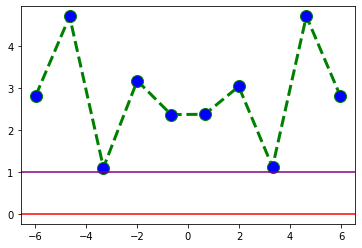

In [35]:
lists = sorted(c.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=1, color='purple', linestyle='-')

plt.show()

In [13]:
ff = {'01000000': 0.107, '10000000': 0.019, '00000010': 0.127, '00100000': 0.023, '00001000': 0.043, '00010000': 0.333, '00000100': 0.348}

exprob_even=0
for key, value in ff.items():
        for g in range(len(key)):
            if g%2!=0 and key[g]=='1':
                print(key)
                exprob_even += g*value 
                
print(exprob_even)

01000000
00010000
00000100
2.846


{'00000100': 355, '00000001': 3, '00010000': 308, '01000000': 117, '10000000': 15, '00000010': 138, '00001000': 36, '00100000': 28}


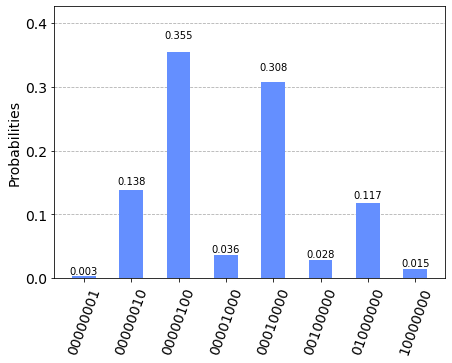

In [10]:
job = execute(circ, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts()

# simulator = Aer.get_backend('qasm_simulator')
# result = execute(circ, simulator).result()
# counts = result.get_counts()
print(counts)
plot_histogram(counts)

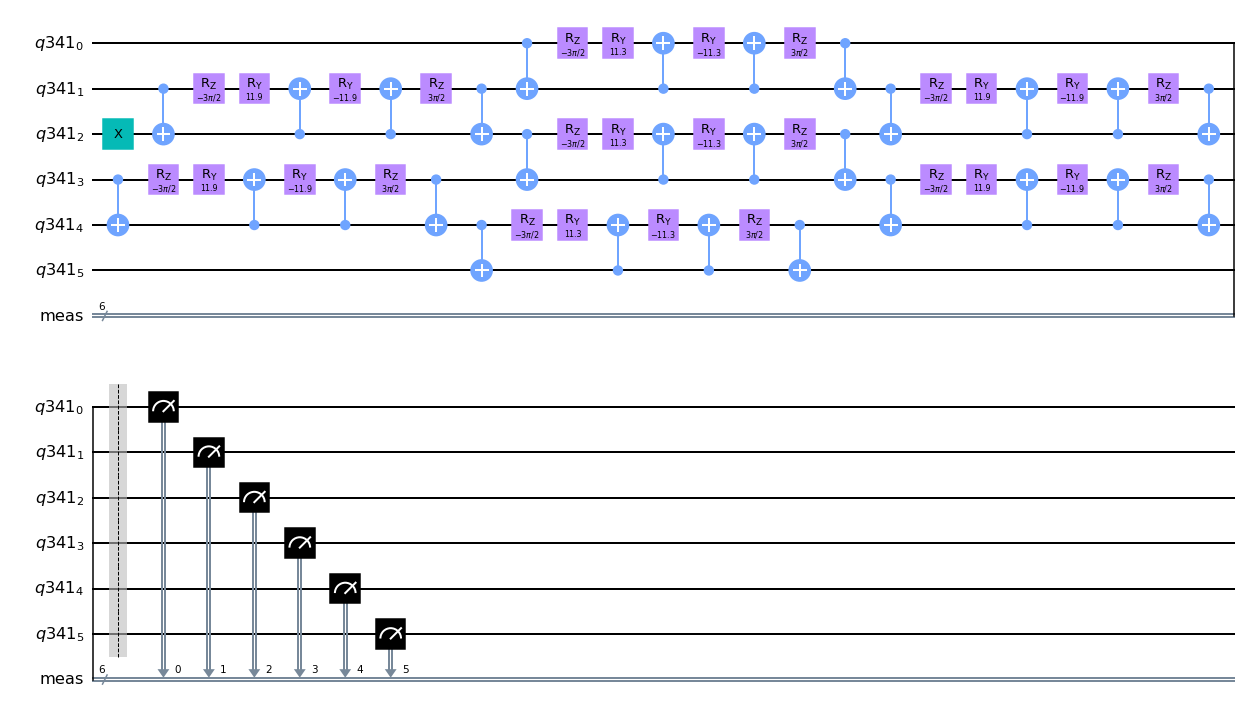

In [34]:
# Circuit 2 for second winding number

def U2(circ2, i, **kwargs):
    circ2.cnot(q2[i], q2[i+1])
    circ2.rz(-6*np.pi/4, q2[i])
    circ2.ry(2*kwargs.get("theta"), q2[i])
    circ2.cnot(q2[i+1], q2[i])
    circ2.ry(-2*kwargs.get("theta"), q2[i])
    circ2.cnot(q2[i+1], q2[i])
    circ2.rz(6*np.pi/4, q2[i])
    circ2.cnot(q2[i], q2[i+1])
    return circ2

def final_circ2(circ2, q2, **kwargs):
    for i in range(len(q2)-1):
        if i%2 != 0:
            f2 = U2(circ2, i, theta = kwargs.get('beta'))
    
    for i in range(len(q2)-1):
        if i%2 == 0:
            f1 = U2(circ2, i, theta = kwargs.get('alpha'))

    for i in range(len(q2)-1):
        if i%2 != 0:
            f2 = U2(circ2, i, theta = kwargs.get('beta'))

    circ2.measure_all()
    
    return circ2

q2 = QuantumRegister(6)
circ2 = QuantumCircuit(q2)
circ2.x(q2[2])
f4 = final_circ2(circ2, q2, alpha=1.8*np.pi, beta = 1.9*np.pi)
circ2.draw(output="mpl")

{'010000': 25, '000001': 29, '001000': 34, '000010': 11, '000100': 1}


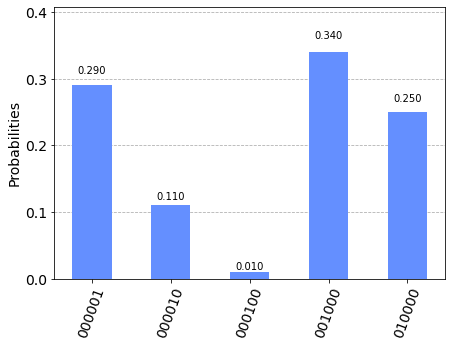

In [35]:
job2 = execute(circ2, Aer.get_backend('qasm_simulator'), shots=100)
counts2 = job2.result().get_counts()

# simulator = Aer.get_backend('qasm_simulator')
# result = execute(circ, simulator).result()
# counts = result.get_counts()
print(counts2)
plot_histogram(counts2)

## Observing Edge States

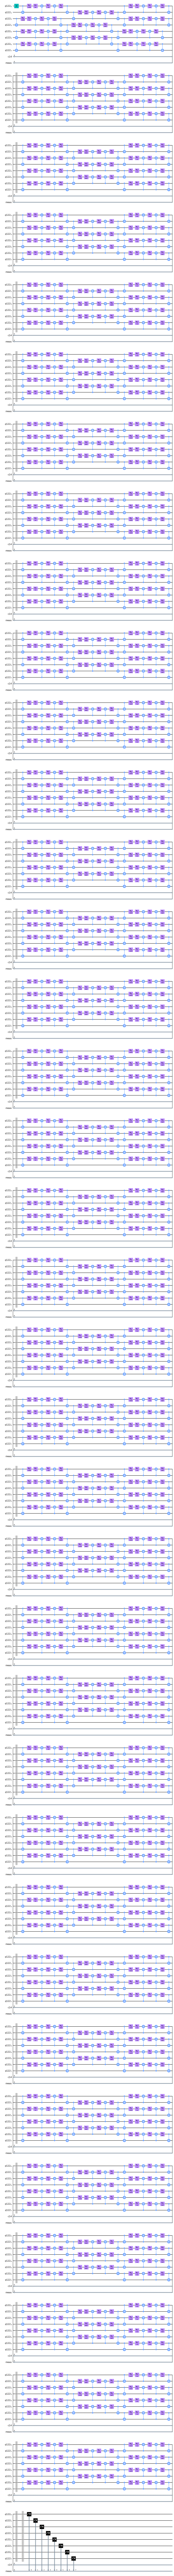

In [15]:
# def U1(circ, i, **kwargs):
#     circ.cnot(q[i], q[i+1])
#     circ.rz(-6*np.pi/4, q[i])
#     circ.ry(2*kwargs.get("theta"), q[i])
#     circ.cnot(q[i+1], q[i])
#     circ.ry(-2*kwargs.get("theta"), q[i])
#     circ.cnot(q[i+1], q[i])
#     circ.rz(6*np.pi/4, q[i])
#     circ.cnot(q[i], q[i+1])
#     return circ

# def final_circ(circ, q, c, **kwargs):
#     for i in range(len(q)-1):
#         if i%2 == 0:
#             f1 = U1(circ, i, theta = kwargs.get('alpha'))

#     for i in range(len(q)-1):
#         if i%2 != 0:
#             f2 = U1(circ, i, theta = kwargs.get('beta'))

#     for i in range(len(q)-1):
#         if i%2 == 0:      
#             f3 = U1(circ, i, theta = kwargs.get('alpha'))
#         circ.measure(q[i], c[i])
    
#     return circ

# q = QuantumRegister(8)
# c = ClassicalRegister(8)
# circ = QuantumCircuit(q, c)
# circ.x(q[0])
# for k in range(1, 4, 1):
#     f4 = final_circ(circ, q, c, alpha=np.pi, beta = 0.9*np.pi)
# circ.draw(output="mpl")

## Circuit 1 for winding number

def U1(circ, i, **kwargs):
    circ.cnot(q[i], q[i+1])
    circ.rz(-6*np.pi/4, q[i])
    circ.ry(2*kwargs.get("theta"), q[i])
    circ.cnot(q[i+1], q[i])
    circ.ry(-2*kwargs.get("theta"), q[i])
    circ.cnot(q[i+1], q[i])
    circ.rz(6*np.pi/4, q[i])
    circ.cnot(q[i], q[i+1])
    return circ

def final_circ(circ, q, c, **kwargs):
    for j in range(kwargs.get('k')):
        for i in range(len(q)-1):
            if i%2 == 0:
                f1 = U1(circ, i, theta = kwargs.get('alpha'))

        for i in range(len(q)-1):
            if i%2 != 0:
                f2 = U1(circ, i, theta = kwargs.get('beta'))

        for i in range(len(q)-1):
            if i%2 == 0:
                f3 = U1(circ, i, theta = kwargs.get('alpha'))
        
        circ.barrier()
    return circ

q = QuantumRegister(8)
c = ClassicalRegister(8)
circ = QuantumCircuit(q, c)
circ.x(q[0])
for k in range(1,9,1):
    f4 = final_circ(circ, q, c, alpha=np.pi, beta = 0.9*np.pi, k=k)
circ.measure_all()
circ.draw(output="mpl")

{'00000001 00000000': 100}


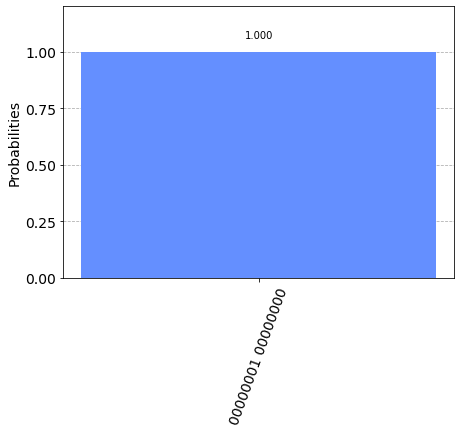

In [16]:
job = execute(circ, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts()

# simulator = Aer.get_backend('qasm_simulator')
# result = execute(circ, simulator).result()
# counts = result.get_counts()
print(counts)
plot_histogram(counts)